## Prediction per link

In [2]:
#Packung für das Sammeln durch den Webcam
import cv2
from pathlib import Path

In [3]:
#Packung für Bilderverarbeitung
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [4]:
#Model Speicherung
from tensorflow.keras.models import load_model

In [5]:
facetracker = load_model('facetracker.h5')

In [6]:
rtp_test = cv2.imread(os.path.join("producttest/harris.jpg"))
rtp_test= cv2.cvtColor(rtp_test, cv2.COLOR_BGR2RGB)

In [7]:
resized = tf.image.resize(rtp_test, (120,120))
size = rtp_test.shape
yhat = facetracker.predict(np.expand_dims(resized/255,0))
status = yhat[0]
sample_coords = yhat[1][0]


1/1 [==============================] - 1s 840ms/step


Es gibt ein Gesicht


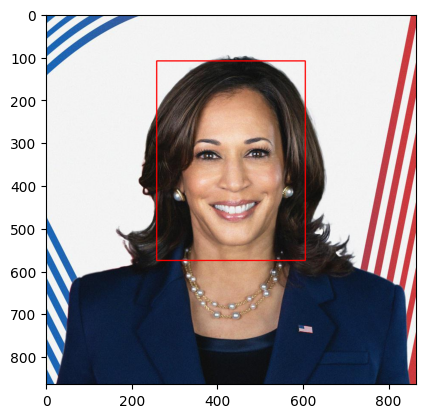

In [8]:
if (status > 0.5):
    print("Es gibt ein Gesicht")
    cv2.rectangle(rtp_test,
              tuple(np.multiply(sample_coords[:2], [size[1],size[0]]).astype(int)),
              tuple(np.multiply(sample_coords[2:], [size[1],size[0]]).astype(int)),
              (255,0,0),2)
else:
    print("Es gibt kein Gesicht")
plt.imshow(rtp_test)